In [19]:
import matplotlib
import matplotlib.colors as cl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
#import row64


## 1.	Circle Bar Chart

In [2]:
def AddLabels(angles, values, labels, offset, ax):
    for ang,val,label, in zip(angles, values, labels):
        rot, align = GetLabelRot(ang, offset)
        ax.text(x=ang,y=val+4,s=label,ha=align,va="center",rotation=rot,rotation_mode="anchor")

def GetLabelRot(ang, offset):
    rot = np.rad2deg(ang + offset)
    if ang <= np.pi:
        align = "right"
        rot = rot + 180
    else: align = "left"
    return rot, align

def CircularBarPlot(inDf,inValueI, inLabelI):
    vals = inDf[inDf.columns[inValueI]]
    vals = (vals/vals.max()) * 80
    labels = inDf[inDf.columns[inLabelI]]
    cWidth = 2 * np.pi / len(vals)
    fig, ax = plt.subplots(figsize=(20,10),subplot_kw={"projection":"polar"})
    ax.set_theta_offset(np.pi/2)
    ax.set_ylim(-100, 100)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    angs = np.linspace(0, 2 * np.pi, len(inDf), endpoint=False)
    ax.bar(angs,vals,width=cWidth,linewidth=2,color="#4393E5",edgecolor="white")
    AddLabels(angs, vals, labels, np.pi/2, ax)


In [12]:
dfIn=pd.read_csv("Movies.csv")

df1 = dfIn[['mpaa_rating','grossboxoffice']]
df = df1.groupby(['mpaa_rating'])['grossboxoffice'].sum()
df = pd.DataFrame(df)

df['mpaa_rating'] = df.index
df2 = df.copy()
df2

,grossboxoffice,mpaa_rating
mpaa_rating,,
G,3.056780e+09,G
PG,8.736396e+09,PG
PG-13,2.253373e+10,PG-13
R,9.660668e+09,R
UR,3.855544e+06,UR


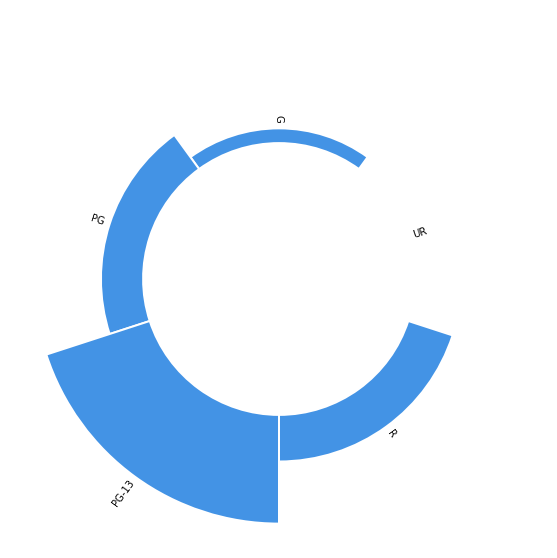

In [13]:
CircularBarPlot(df2,0,1)

## 2.Bar Chart

In [20]:
def GradientBars(inDf, inValueI, inNameI):
    cList = ['#479DDD', '#83B3DF']
    values = inDf[inDf.columns[inValueI]]
    names = inDf[inDf.columns[inNameI]]
    plt.rc('xtick', labelsize=8)
    plt.rc('ytick', labelsize=7)
    x_pos = np.arange(len(names))
    plt.xticks(x_pos, names,horizontalalignment='right',rotation=45)
    cRGB = [cl.to_rgb(col) for col in cList]
    bars = plt.bar(x_pos, values, color=cList[0])
    cmap = cl.LinearSegmentedColormap.from_list("", cRGB)
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        grad = np.atleast_2d(np.linspace(0,1*w/max(values),256))
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0, cmap=cmap)
    ax.axis(lim)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


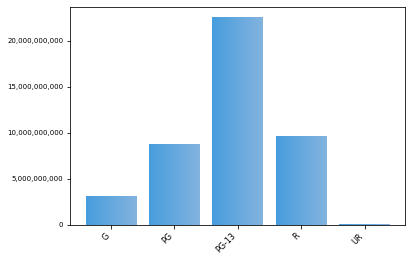

In [21]:
GradientBars(df2,0,1)

3

In [24]:
dfIn=pd.read_csv("Movies.csv")

df1 = dfIn[['classgrossboxoffice','grossboxoffice']]
df = df1.groupby(['classgrossboxoffice'])['grossboxoffice'].sum()
df = pd.DataFrame(df)

df['classgrossboxoffice'] = df.index
df2 = df.copy()
df2

,grossboxoffice,classgrossboxoffice
classgrossboxoffice,,
1,9.701502e+06,1
2,5.875547e+07,2
3,3.259904e+08,3
4,8.793904e+08,4
5,1.780529e+09,5
6,2.877493e+09,6
7,4.573473e+09,7
8,8.104732e+09,8
9,2.538136e+10,9


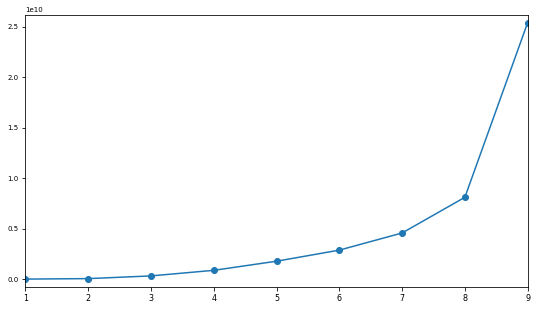

In [25]:
def LineScatter(inDf, inCol1, inCol2):
    cName1 = inDf.columns[inCol1]
    cName2 = inDf.columns[inCol2]
    plt.figure(figsize=(9,5))
    plt.margins(0, 0.03)
    plt.plot(inDf[cName1], inDf[cName2],marker='o')

LineScatter(df2,1,0)
